In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [2]:
# Es el momento de ponernos manos a la obra con la visualización de datos. En este primer ejercicio de pair programming 
# trabajaremos con el csv que generamos en el ejercicio de pair programming de Pandas III, ese en el que habíamos eliminado algunas 
# columnas de nuestro csv.

df=pd.read_csv('./datos/attacks_modificado.csv')
df.head()

,case-number,unnamed:-0,year,type,country,area,location,activity,name,sex-,age,time,species-,href,case-number.2
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18
2,2018.06.09,2,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09
3,2018.06.08,3,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,NaN,2 m shark,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08
4,2018.06.04,4,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,NaN,"Tiger shark, 3m",http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04


In [ ]:

# Hoy realizaremos una serie de gráficas usando la librería de matplotlib para familiarizarnos un poco con los datos.
# 📌 Para poder solucionar los ejercicios de hoy no solo tendremos que visualizar, 
# también tendremos que usar métodos que hemos aprendido en lecciones anteriores de 
# Pandas como por ejemplo value_counts(), isnull, describe, etc.

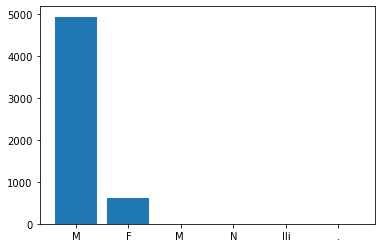

In [28]:
# Tendréis que realizar gráficas para contestar a las siguientes preguntas:
# ¿Cuál es la frecuencia de cada una de las categorías de la columna sex?
serie_cuentas= df['sex-'].value_counts()
x= serie_cuentas.index #los diferentes tipos de valores que contiene la columna
y= serie_cuentas.values #la frecuencia en la que los valores aparecen

plt.figure()

plt.bar(x,y)

plt.show()

In [ ]:
# ¿Cuál es el porcentaje de nulos por columna? Usa un pie chart donde incluyáis el porcentaje de cada variable en el interior del quesito. 
# Para eso tendréis que usar el parámetro autopct, aquí algo de documentación.

In [19]:
shape_df= df.shape
valores_nulos=df.isna().sum()
porcentajes=valores_nulos/shape_df[0]*100
porcentajes


case-number       0.016356
unnamed:-0        0.000000
year              0.000000
type              0.065424
country           0.654236
area              6.673209
location          7.981681
activity          8.357867
name              3.271181
sex-              8.995747
age              43.604841
time             52.011776
species-         44.242722
href              0.000000
case-number.2     0.000000
dtype: float64

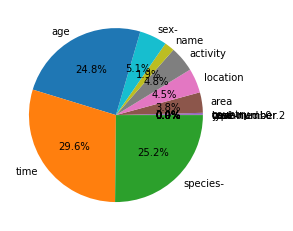

In [35]:
variables=['case-number', 'unnamed:-0', 'year', 'type', 'country', 'area',
       'location', 'activity', 'name', 'sex-', 'age', 'time', 'species-',
       'href', 'case-number.2']


data=porcentajes
plt.figure()

plt.pie(data.values, labels=variables, autopct='%1.1f%%')
plt.show()

In [14]:

# ¿Cuál es el número total de valores únicos de cada una de las columnas categóricas del DataFrame?
describe= df.describe(include='object')
describe.loc['unique']

case-number      6113
type                8
country           201
area              791
location         4020
activity         1484
name             5118
sex-                6
age               156
time              366
species-         1529
href             6099
case-number.2    6114
Name: unique, dtype: object

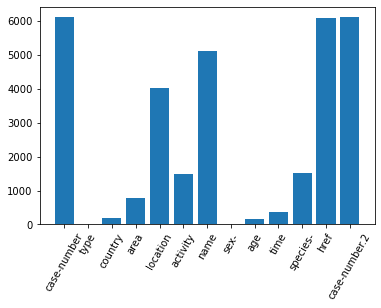

In [15]:
describe= describe.loc['unique']
x= describe.index #variable categórica (nombres de las columnas del df)
y= describe.values #variable numérica (número total de valores únicos de cada columna del df)

plt.figure()

plt.bar(x,y)
plt.xticks(rotation=60) #incluimos una opción para girar los nombres del eje x para facilitar la legibilidad 

plt.show()



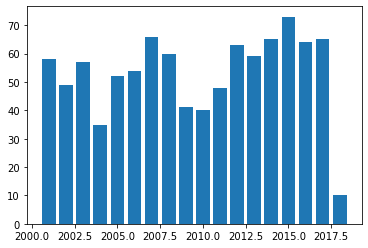

In [93]:
# Filtrad los datos para quedarnos solo con los datos de USA.
# ¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.


usa= df[df['country']=='USA']['year'].value_counts()

x= usa[usa.index >2000].index #los diferentes tipos de valores que contiene la columna, en este caso los años
y= usa[usa.index >2000].values #la frecuencia en la que los valores aparecen 

plt.figure()

plt.bar(x,y)

plt.show()


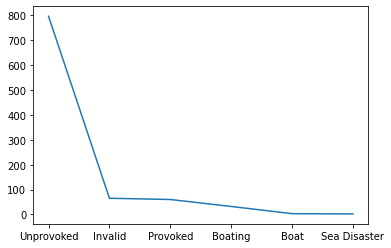

In [95]:
# En función del tipo, ¿cuántos ataques de tiburones de cada tipo hubo en USA? Muestra los resultados en un gráfico de línea.

usa=df[(df["country"] == "USA") & (df["year"] >2000)]['type'].value_counts() #aplicamos los filtros necesarios
plt.figure()

x= usa.index #los diferentes tipos de valores que contiene la columna, en este caso los años
y= usa.values #la frecuencia en la que los valores aparecen 


plt.plot(x, y)
plt.show()

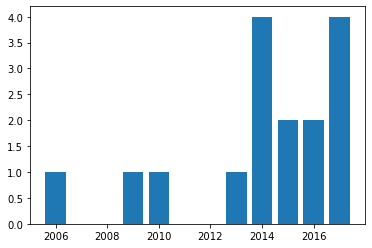

In [96]:

# Filtrad los datos para Spain:
# ¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

spain= df[df['country']=='SPAIN']['year'].value_counts()

x= spain[spain.index >2000].index #los diferentes tipos de valores que contiene la columna, en este caso los años
y= spain[spain.index >2000].values #la frecuencia en la que los valores aparecen 

plt.figure()

plt.bar(x,y)

plt.show()


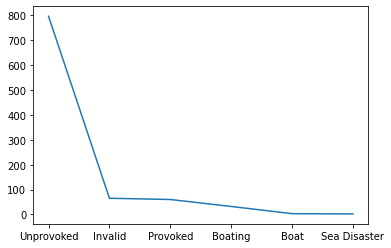

In [97]:
# En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de línea.

spain=df[(df["country"] == "USA") & (df["year"] >2000)]['type'].value_counts() #aplicamos los filtros necesarios
plt.figure()

x= spain.index #los diferentes tipos de valores que contiene la columna, en este caso los años
y= spain.values #la frecuencia en la que los valores aparecen 


plt.plot(x, y)
plt.show()